In [485]:
import pandas as pd

df=pd.read_csv("loan_approval_dataset.csv")

In [486]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [487]:
df.shape

(4269, 13)

In [488]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [489]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [490]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [491]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel=' education', ylabel='count'>

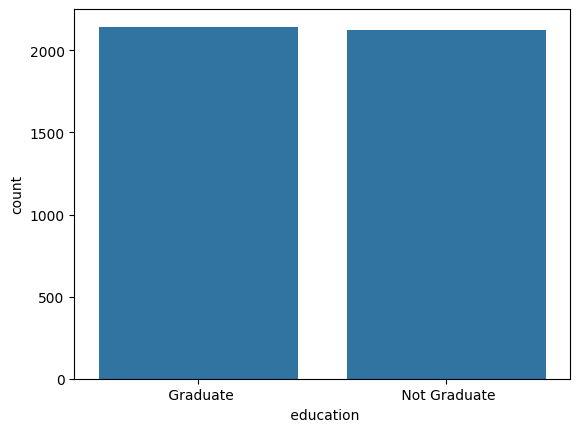

In [492]:
import seaborn as sns
sns.countplot(data=df, x=" education")


In [493]:
df[" education"].value_counts()

 education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64

<Axes: xlabel=' loan_status', ylabel='count'>

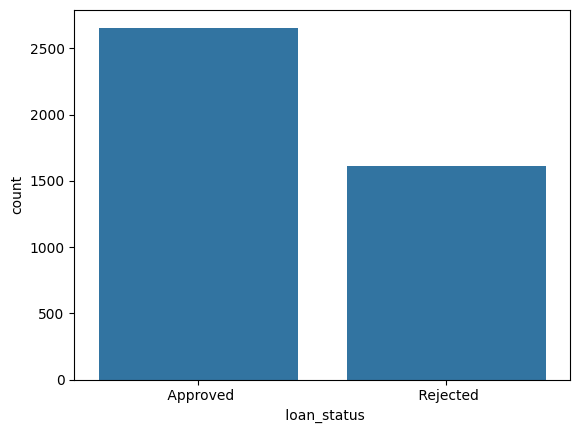

In [494]:
sns.countplot(data=df, x=" loan_status")

In [495]:
df[" loan_status"].value_counts()

 loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

Text(0.5, 1.0, 'Education vs Loan Status')

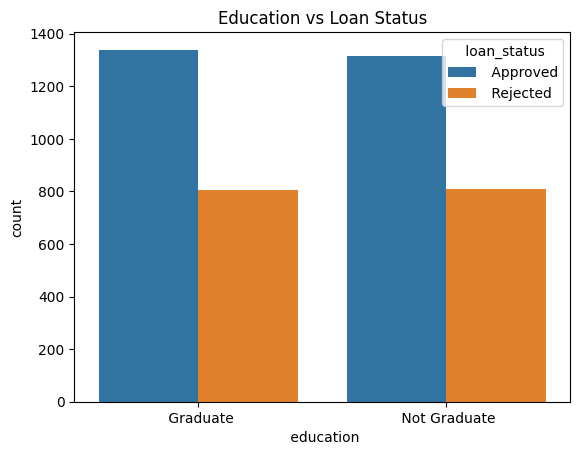

In [496]:
import matplotlib.pyplot as plt
sns.countplot(data=df, x=" education", hue=" loan_status")
plt.title("Education vs Loan Status")

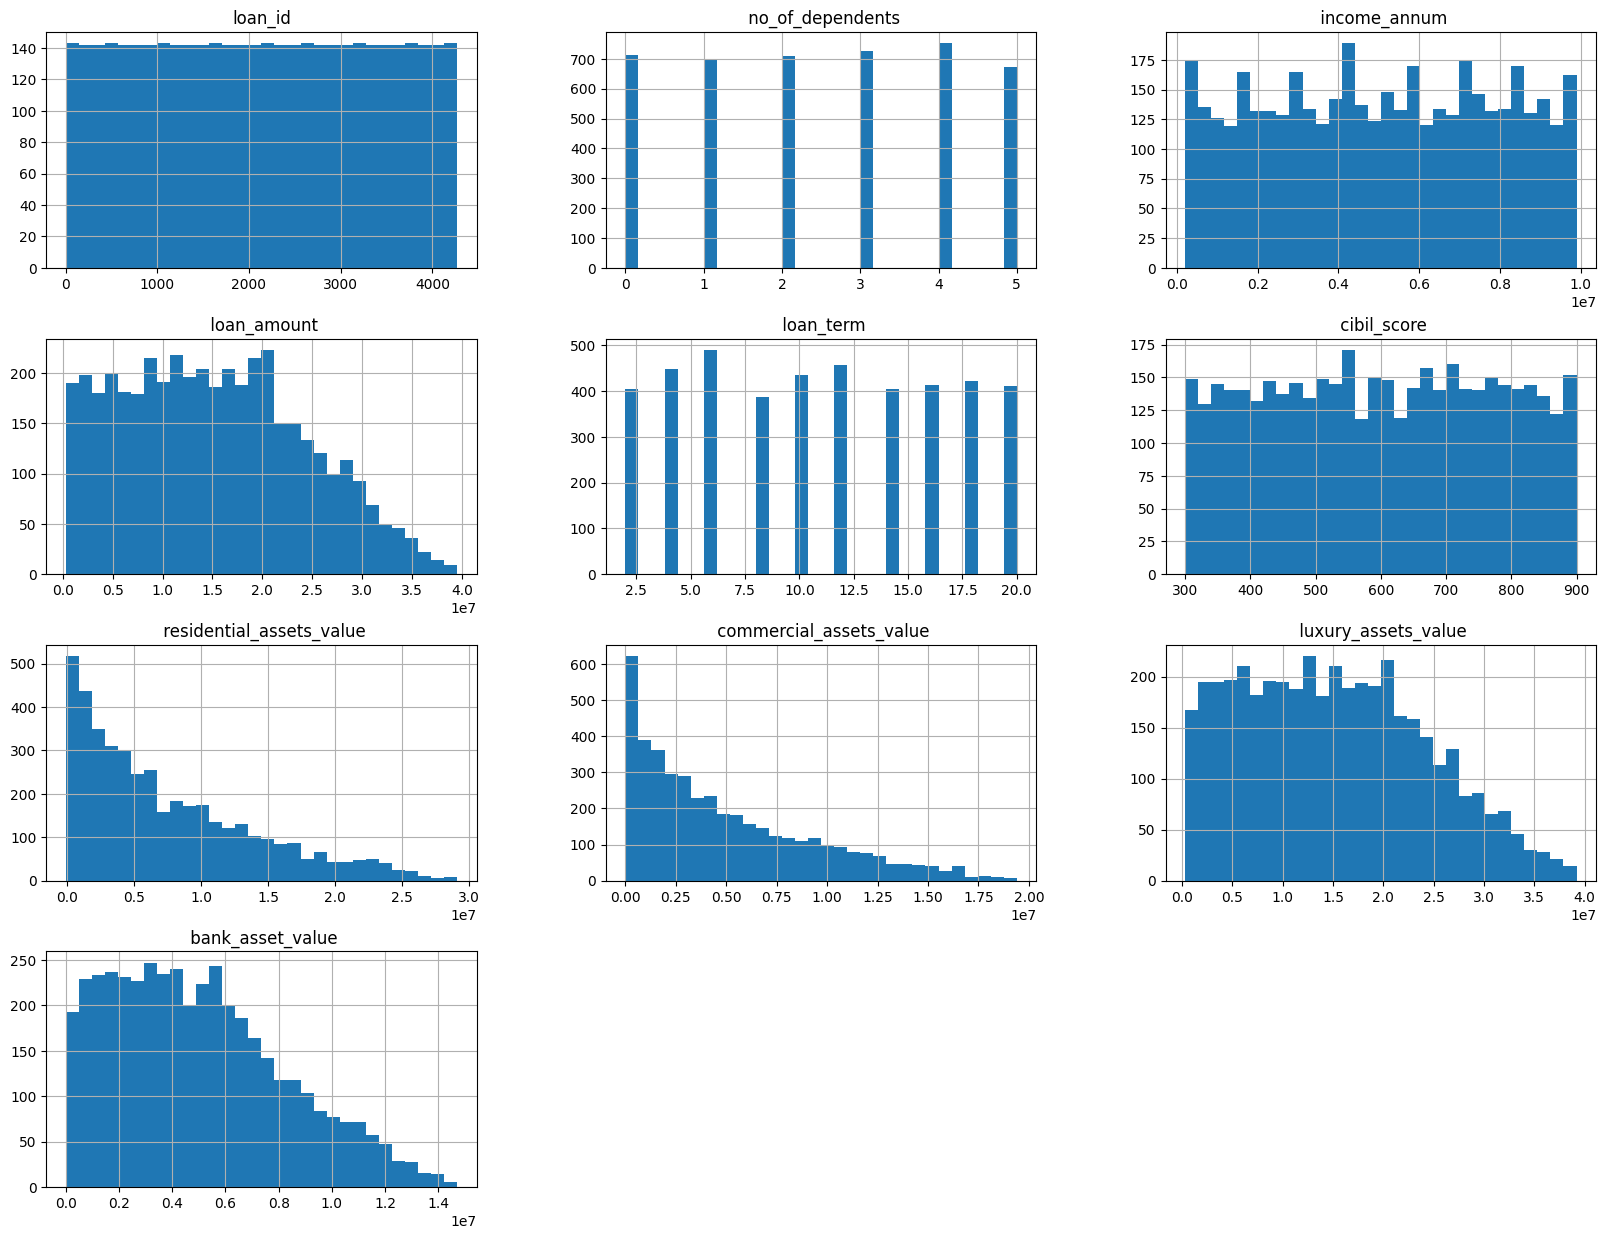

In [497]:
df.hist(bins=30, figsize=(20,15))
plt.show()

In [498]:

from sklearn.preprocessing import OrdinalEncoder
encoding=OrdinalEncoder()
df[" education"]=encoding.fit_transform(df[[" education"]])
df[" loan_status"]=encoding.fit_transform(df[[" loan_status"]])
df[" self_employed"]=encoding.fit_transform(df[[" self_employed"]])
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0.0,0.0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0.0
1,2,0,1.0,1.0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1.0
2,3,3,0.0,0.0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1.0
3,4,3,0.0,0.0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1.0
4,5,5,1.0,1.0,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1.0


<Axes: >

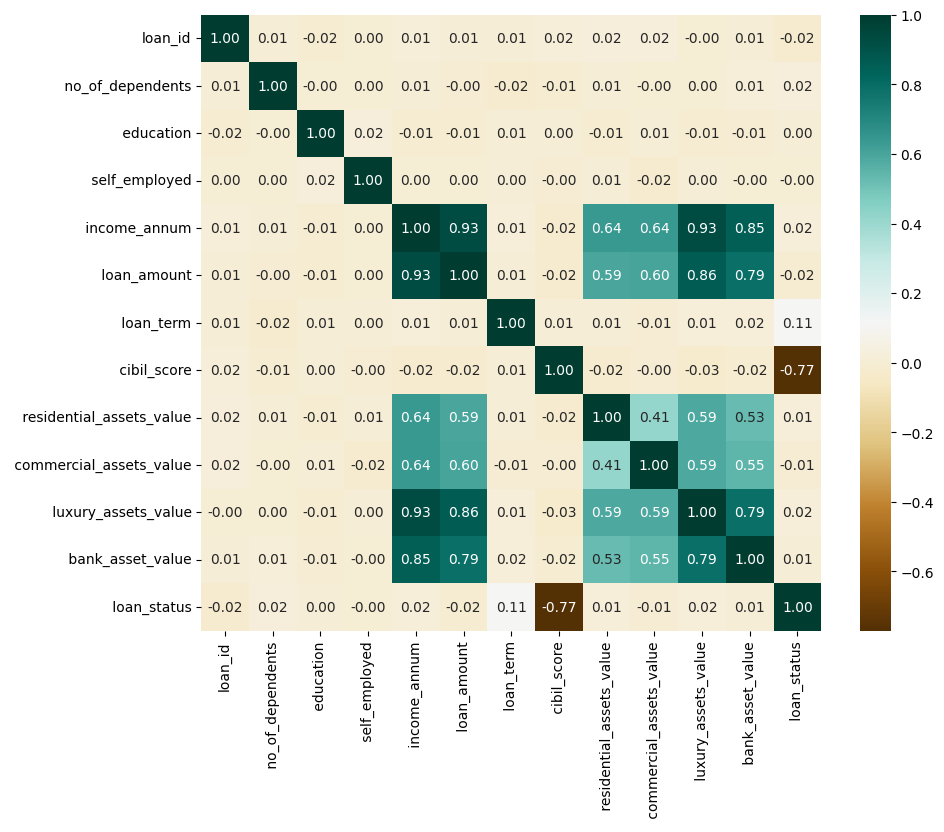

In [499]:
cor=df.corr()
# figure(figsize=(10,8))
plt.figure(figsize=(10,8))
sns.heatmap(cor, annot=True,cmap="BrBG", fmt=".2f")

In [500]:
importance = df.corr()[" loan_status"].sort_values(ascending=False)
print(importance)

 loan_status                 1.000000
 loan_term                   0.113036
 no_of_dependents            0.018114
 luxury_assets_value         0.015465
 income_annum                0.015189
 residential_assets_value    0.014367
 bank_asset_value            0.006778
 education                   0.004918
 self_employed              -0.000345
 commercial_assets_value    -0.008246
 loan_amount                -0.016150
loan_id                     -0.017685
 cibil_score                -0.770518
Name:  loan_status, dtype: float64


In [501]:
X=df.drop(["loan_id"," loan_status"], axis=1)
y=df[" loan_status"]

In [502]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [503]:

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


In [504]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_res, y_train_res)


C:\Users\My Lap\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [505]:
y_pred = model.predict(X_test)

In [506]:
# Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
cm=confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm )
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7306791569086651
Confusion Matrix:
 [[456  80]
 [150 168]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.85      0.80       536
         1.0       0.68      0.53      0.59       318

    accuracy                           0.73       854
   macro avg       0.71      0.69      0.70       854
weighted avg       0.72      0.73      0.72       854



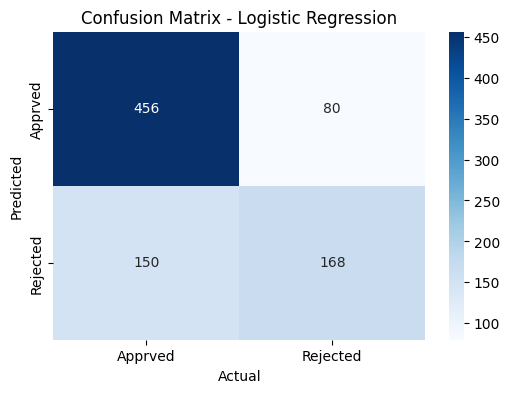

In [507]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Apprved","Rejected"], yticklabels=["Apprved","Rejected"])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [508]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

In [509]:
dt_model.fit(X_train_res, y_train_res)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [510]:
y_pred_dt = dt_model.predict(X_test)

In [511]:
# Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy_dt)
cm_dt=confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:\n",cm_dt )
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Accuracy: 0.9730679156908665
Confusion Matrix:
 [[524  12]
 [ 11 307]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       536
         1.0       0.96      0.97      0.96       318

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



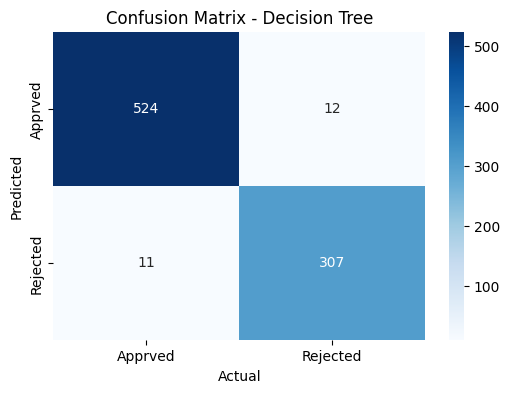

In [512]:
plt.figure(figsize=(6,4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap="Blues", xticklabels=["Apprved","Rejected"], yticklabels=["Apprved","Rejected"])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

In [513]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train_res, y_train_res)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [514]:
y_pred_rf = rf_model.predict(X_test)

In [515]:
# Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)
cm_rf=confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n",cm_rf )
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.977751756440281
Confusion Matrix:
 [[529   7]
 [ 12 306]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       536
         1.0       0.98      0.96      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.98       854
weighted avg       0.98      0.98      0.98       854



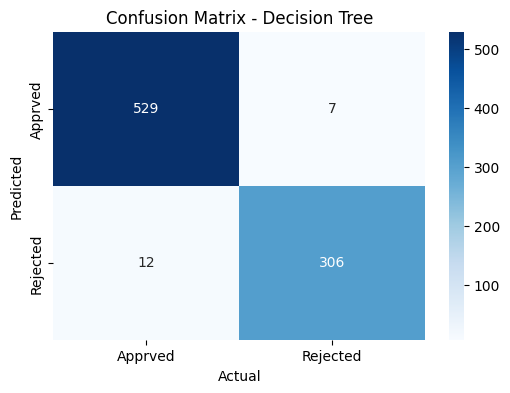

In [516]:
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap="Blues", xticklabels=["Apprved","Rejected"], yticklabels=["Apprved","Rejected"])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

In [517]:
import pickle
with open("loan_approval_model.pkl", "wb") as f:
    pickle.dump(model, f)
with open("loan_approval_dt_model.pkl", "wb") as f:
    pickle.dump(dt_model, f)
with open("loan_approval_rf_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)      

print("Models saved successfully")

Models saved successfully
